<a href="https://colab.research.google.com/github/nathalyAlarconT/HelloML/blob/master/REGRESION/Regression_Boston.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import sklearn
from sklearn import datasets
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Boston Dataset

In [2]:
# Trabajaremos con el dataset de precios de casas de boston. 
# Este dataset está incluido en los datasets de sklearn
boston_info = datasets.load_boston()
# Veamos los elementos de los que disponemos
boston_info.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])

In [3]:
# boston_info
print(boston_info.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [4]:
# Vamos a crear el dataframe
df_boston = pd.DataFrame(boston_info['data'], columns=boston_info.feature_names)
df_boston.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [5]:
# Debemos adicionar la columna que trataremos de predecir, es decir ...
# la columna que almacena el precio de las casas. 
# Median value of owner-occupied homes in $1000's
df_boston['TARGET'] = boston_info['target']
print("Dimensiones del dataset", df_boston.shape )
df_boston.head()

Dimensiones del dataset (506, 14)


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,TARGET
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [6]:
# Estudiemos un poco el dataset
df_boston.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,TARGET
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [7]:
# Analicemos los precios de las casas que trataremos de predecir
# La media de los precios
print("Media de los precios ", df_boston.TARGET.mean())
# El precio min
print("Precio mínimo", df_boston.TARGET.min())
# El precio max
print("Precio máximo", df_boston.TARGET.max())

Media de los precios  22.532806324110698
Precio mínimo 5.0
Precio máximo 50.0


In [0]:
# Preparemos el dataset para el entrenamiento del modelo
from sklearn.model_selection import train_test_split

In [10]:
# Dividiremos el dataset en dos partes
# Guardaremos el 20% de los datos para que sean parte del dataset de test

test_percentage = 0.20
X_train, X_test, Y_train, Y_test = train_test_split( df_boston[boston_info.feature_names] , df_boston['TARGET'], test_size = test_percentage)
print("X_train: ", X_train.shape, " Y_train: ", Y_train.shape)
print("X_test: ", X_test.shape, " Y_test: ",Y_test.shape )


X_train:  (404, 13)  Y_train:  (404,)
X_test:  (102, 13)  Y_test:  (102,)


In [0]:
# Importamos el modelo deseado desde sklearn
from sklearn.linear_model import LinearRegression

In [12]:
# Entrenemos nuestro modelo de regresion lineal
lm = LinearRegression()
lm.fit(X_train, Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [15]:
#Intercept:
print(lm.intercept_)
#Slope:
print(lm.coef_)


39.38695762872659
[-1.08913648e-01  5.33666522e-02 -5.63508984e-03  2.39127482e+00
 -1.85092107e+01  3.29195758e+00  1.21783686e-02 -1.69210211e+00
  2.95602182e-01 -1.08961146e-02 -8.58969449e-01  9.42377586e-03
 -6.34035947e-01]


In [0]:
# Obtengamos predicciones para nuestro dataset de test
Y_pred = lm.predict(X_test)


In [17]:
# Comparemos las predicciones con los valores reales
df_model_res = pd.DataFrame({'Actual': Y_test, 'Predicted': Y_pred})
# Observemos una muestra aleatoria de 10 predicciones
df_model_res.sample(10)


,Actual,Predicted
179,37.2,33.275385
231,31.7,33.386521
246,24.3,19.351474
345,17.5,15.866947
204,50.0,42.882976
214,23.7,8.849577
143,15.6,10.987281
178,29.9,31.766699
366,21.9,16.666869
377,13.3,19.826108


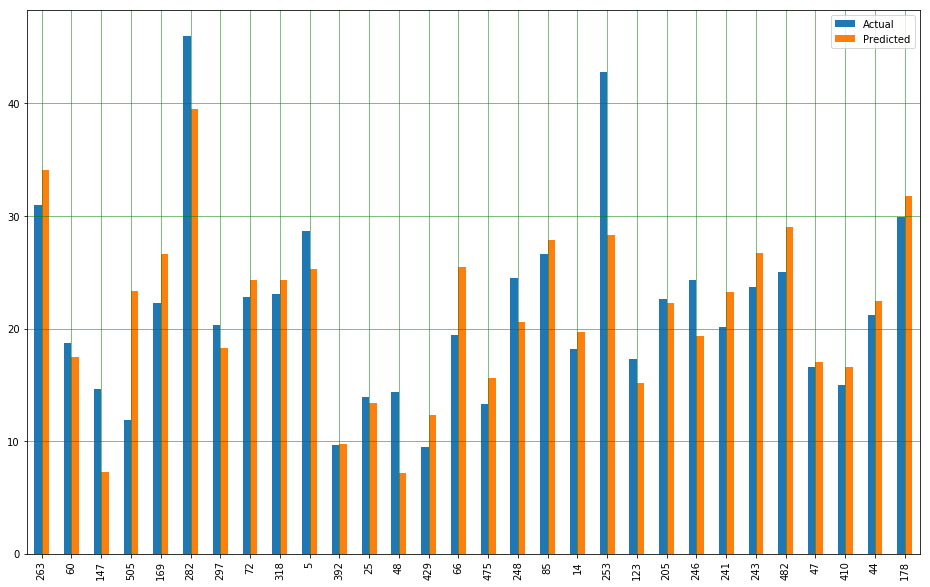

In [27]:
# Comparemos los valores predecidos con los reales
df1 = df_model_res.sample(30)
df1.plot(kind='bar',figsize=(16,10))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

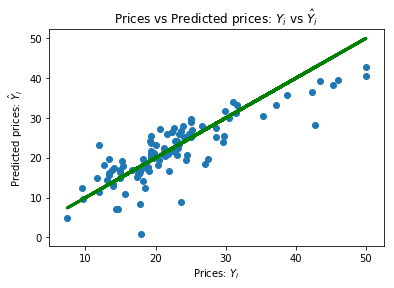

In [28]:
# Grafiquemos la linea de regresión lineal identificada por el modelo
plt.plot(Y_test, Y_test, color='green', linewidth=3)
plt.scatter(Y_test, Y_pred)
plt.xlabel("Prices: $Y_i$")
plt.ylabel("Predicted prices: $\hat{Y}_i$")


plt.title("Prices vs Predicted prices: $Y_i$ vs $\hat{Y}_i$")
plt.show()

In [30]:
# Veamos las métricas de evaluación del modelo
# Mean Squared Error
mse = sklearn.metrics.mean_squared_error(Y_test, Y_pred)
print(mse)
# RMSE
rmse = np.sqrt(mse)
print (rmse)
# R2 score
r2_score = sklearn.metrics.r2_score(Y_test, Y_pred)
print(r2_score)

21.987014861311675
4.68903133507462
0.7065283638666928
